<a href="https://colab.research.google.com/github/beccacauthorn/ds/blob/master/Saltiest_Hacker_Pandas_DF_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Intrusctions from https://www.kaggle.com/dansbecker/getting-started-with-sql-and-bigquery
from google.cloud import bigquery

# Need to authenticate -- see https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=SeTJb51SKs_W
from google.colab import auth
auth.authenticate_user()

In [3]:
# Create a "Client" object
client = bigquery.Client(project="stone-flux-280702")

In [4]:
# Run SQL query to obtain filtered table
query_string = """
SELECT C.by
FROM (
  SELECT A.by, COUNT(*) AS count
  FROM `bigquery-public-data.hacker_news.full` AS A
  GROUP BY A.by
  ORDER BY count DESC
  LIMIT 100
) AS C
WHERE C.by != "None"
"""

frequent_users = client.query(query_string).result().to_dataframe()

In [5]:
# This is a triple-nested query that gets a number of comments made only by the most
# frequent users.  Change the "LIMIT XXX" part of the inner-most query to tune the
# number of users.  Change the outermost "LIMIT YYY" to change the total number of comments.
query_string = """
SELECT *
FROM `bigquery-public-data.hacker_news.full` AS A
WHERE A.by IN (
  SELECT C.by
  FROM (
    SELECT A.by, COUNT(*) AS count
    FROM `bigquery-public-data.hacker_news.full` AS A
    GROUP BY A.by
    ORDER BY count DESC
    LIMIT 500
  ) AS C
  WHERE C.by != "None"
)
LIMIT 500000
"""

df = client.query(query_string).result().to_dataframe()

In [6]:
df.head()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,No indication of how large these programs are ...,None,pjc50,NaN,1557783585,2019-05-13 21:39:45+00:00,comment,19904253,19896542.0,NaN,None,None
1,None,None,"Well, if you want to obfuscate a constant stri...",None,thaumasiotes,NaN,1396076803,2014-03-29 07:06:43+00:00,comment,7491659,7491605.0,NaN,None,None
2,None,None,"Yeah, it&#x27;s like how we had to stop using ...",None,coldtea,NaN,1497896537,2017-06-19 18:22:17+00:00,comment,14589123,14588063.0,NaN,None,None
3,Computers Might Just 'See' Like Humans After All,http://motherboard.vice.com/read/computers-mig...,None,None,jonbaer,2.0,1462006100,2016-04-30 08:48:20+00:00,story,11600974,NaN,0.0,None,None
4,Q&A: Pulsar Pioneer Jocelyn Bell Burnell,https://physicstoday.scitation.org/do/10.1063/...,None,None,sohkamyung,2.0,1548914093,2019-01-31 05:54:53+00:00,story,19042710,NaN,0.0,None,None


In [7]:
df.shape

(500000, 14)

In [8]:
df['by'].value_counts()

tptacek         7351
jacquesm        5654
dang            5617
rbanffy         4734
dragonwriter    4615
                ... 
Gibbon1          533
icey             531
MBCook           528
zokier           522
tripzilch        521
Name: by, Length: 499, dtype: int64

In [9]:
df['type'].value_counts()

comment    446968
story       52747
pollopt       252
poll           30
job             3
Name: type, dtype: int64

In [15]:
# filter out by type (keep story and comment)
df[(df['type'] == 'story') | (df['type'] == 'comment')]

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,No indication of how large these programs are ...,None,pjc50,NaN,1557783585,2019-05-13 21:39:45+00:00,comment,19904253,19896542.0,NaN,None,None
1,None,None,"Well, if you want to obfuscate a constant stri...",None,thaumasiotes,NaN,1396076803,2014-03-29 07:06:43+00:00,comment,7491659,7491605.0,NaN,None,None
2,None,None,"Yeah, it&#x27;s like how we had to stop using ...",None,coldtea,NaN,1497896537,2017-06-19 18:22:17+00:00,comment,14589123,14588063.0,NaN,None,None
3,Computers Might Just 'See' Like Humans After All,http://motherboard.vice.com/read/computers-mig...,None,None,jonbaer,2.0,1462006100,2016-04-30 08:48:20+00:00,story,11600974,NaN,0.0,None,None
4,Q&A: Pulsar Pioneer Jocelyn Bell Burnell,https://physicstoday.scitation.org/do/10.1063/...,None,None,sohkamyung,2.0,1548914093,2019-01-31 05:54:53+00:00,story,19042710,NaN,0.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,None,None,If we were talking about the out-of-tree Virtu...,None,cyphar,NaN,1556782094,2019-05-02 07:28:14+00:00,comment,19805584,19800311.0,NaN,None,None
499996,None,None,"I'm not familiar with the Digg data model, but...",None,mistermann,NaN,1269663057,2010-03-27 04:10:57+00:00,comment,1222556,1221798.0,NaN,None,None
499997,None,None,Which is why they dropped OpenSSL.,None,mikeash,NaN,1350422565,2012-10-16 21:22:45+00:00,comment,4661921,4661901.0,NaN,None,None
499998,None,None,See the &quot;real article&quot; [0] that this...,None,jlgaddis,NaN,1505537779,2017-09-16 04:56:19+00:00,comment,15262959,15262796.0,NaN,None,None


In [21]:
# drop some columns
#drop title, has 447,218 null values 
#drop ranking, has 500000 null values
#drop score, has 446968 null values 
df.drop(['time', 'descendants', 'deleted', 'url', 'dead', 'title', 'ranking', 'score'], axis=1)


,text,by,timestamp,type,id,parent
0,No indication of how large these programs are ...,pjc50,2019-05-13 21:39:45+00:00,comment,19904253,19896542.0
1,"Well, if you want to obfuscate a constant stri...",thaumasiotes,2014-03-29 07:06:43+00:00,comment,7491659,7491605.0
2,"Yeah, it&#x27;s like how we had to stop using ...",coldtea,2017-06-19 18:22:17+00:00,comment,14589123,14588063.0
3,None,jonbaer,2016-04-30 08:48:20+00:00,story,11600974,NaN
4,None,sohkamyung,2019-01-31 05:54:53+00:00,story,19042710,NaN
...,...,...,...,...,...,...
499995,If we were talking about the out-of-tree Virtu...,cyphar,2019-05-02 07:28:14+00:00,comment,19805584,19800311.0
499996,"I'm not familiar with the Digg data model, but...",mistermann,2010-03-27 04:10:57+00:00,comment,1222556,1221798.0
499997,Which is why they dropped OpenSSL.,mikeash,2012-10-16 21:22:45+00:00,comment,4661921,4661901.0
499998,See the &quot;real article&quot; [0] that this...,jlgaddis,2017-09-16 04:56:19+00:00,comment,15262959,15262796.0


In [30]:
# average of all texts
df['text'].str.len().mean()

423.7787797330666

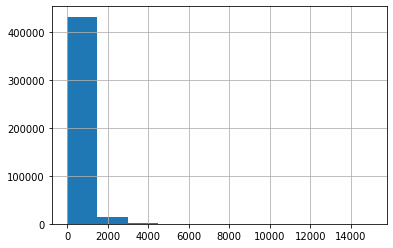

In [34]:
# histogram of all text lengths
df['text'].str.len().hist()

In [39]:
# description of story texts
df[df['type'] == 'story']['text'].str.len().describe()

count     669.000000
mean      606.789238
std       697.342040
min         1.000000
25%       210.000000
50%       401.000000
75%       776.000000
max      7560.000000
Name: text, dtype: float64

In [40]:
# description of comment texts
df[df['type'] == 'comment']['text'].str.len().describe()

count    446952.000000
mean        423.729669
std         488.017941
min           1.000000
25%         144.000000
50%         276.000000
75%         523.000000
max       15018.000000
Name: text, dtype: float64

In [47]:
df[df['type'] == 'comment']['text'].str.len() <= 5]

SyntaxError: ignored